<a href="https://colab.research.google.com/github/Harshi-63/AD-Lab/blob/main/Lab-2/CatDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

: 

In [2]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"clara69","key":"0af05d86163b4047d4f3e65cd543fc5d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification


Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
 85% 55.0M/64.4M [00:00<00:00, 192MB/s]
100% 64.4M/64.4M [00:00<00:00, 197MB/s]


In [6]:
import zipfile

with zipfile.ZipFile("cats-and-dogs-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [8]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define image size to resize images
IMG_SIZE = 64

# Function to load the dataset
def load_dataset(dataset_path):
    data, labels = [], []

    # Define the full paths to the 'cats' and 'dogs' subdirectories
    cats_folder = os.path.join(dataset_path, "cats")
    dogs_folder = os.path.join(dataset_path, "dogs")

    # Check if the 'cats' folder exists
    if not os.path.exists(cats_folder):
        print(f"Error: The folder '{cats_folder}' does not exist.")

    # Check if the 'dogs' folder exists
    if not os.path.exists(dogs_folder):
        print(f"Error: The folder '{dogs_folder}' does not exist.")

    # Load 'cats' images
    if os.path.exists(cats_folder):
        for file_name in os.listdir(cats_folder):
            file_path = os.path.join(cats_folder, file_name)
            if os.path.isfile(file_path):  # Ensure it's a file
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append("cat")

    # Load 'dogs' images
    if os.path.exists(dogs_folder):
        for file_name in os.listdir(dogs_folder):
            file_path = os.path.join(dogs_folder, file_name)
            if os.path.isfile(file_path):  # Ensure it's a file
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    data.append(img)
                    labels.append("dog")

    return np.array(data), np.array(labels)

# Path to the extracted folder (update with your actual path)
dataset_path = '/content/dataset/train'  # The 'train' folder inside the dataset

# Load and preprocess data
data, labels = load_dataset(dataset_path)

if data.shape[0] == 0:
    print("No images loaded. Please check the directory and dataset.")
else:
    print("Loaded data shape:", data.shape)
    print("Loaded labels shape:", labels.shape)

# Normalize pixel values
data = data / 255.0

# Encode labels (cats=0, dogs=1)
le = LabelEncoder()
labels = le.fit_transform(labels)  # Encode labels (cats=0, dogs=1)

# Proceed with splitting the dataset or further processing


Loaded data shape: (557, 64, 64, 3)
Loaded labels shape: (557,)


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
# Flatten the images for ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("Flattened training data shape:", X_train_flat.shape)
print("Flattened test data shape:", X_test_flat.shape)



Training data shape: (445, 64, 64, 3)
Test data shape: (112, 64, 64, 3)
Flattened training data shape: (445, 12288)
Flattened test data shape: (112, 12288)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM classifier with a linear kernel
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train_flat, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_flat)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


SVM Accuracy: 57.14%


In [12]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_flat, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_flat)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")


Logistic Regression Accuracy: 59.82%


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_flat)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 53.57%


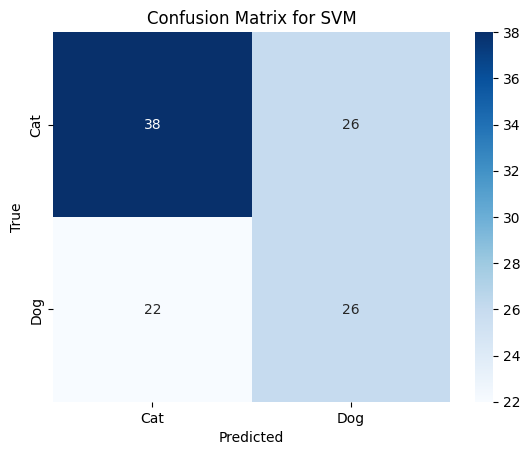

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Cat", "Dog"]))


SVM Classification Report:
              precision    recall  f1-score   support

         Cat       0.63      0.59      0.61        64
         Dog       0.50      0.54      0.52        48

    accuracy                           0.57       112
   macro avg       0.57      0.57      0.57       112
weighted avg       0.58      0.57      0.57       112



In [16]:
import joblib

# Save the models
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [17]:
# Load the saved models
svm_loaded = joblib.load('svm_model.pkl')
lr_loaded = joblib.load('logistic_regression_model.pkl')
rf_loaded = joblib.load('random_forest_model.pkl')

# Use the loaded models to make predictions
y_pred_svm_loaded = svm_loaded.predict(X_test_flat)
y_pred_lr_loaded = lr_loaded.predict(X_test_flat)
y_pred_rf_loaded = rf_loaded.predict(X_test_flat)
